In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
from sklearn import linear_model

In [4]:
clf = linear_model.LinearRegression()

## Biến số
    fit_intercept: nếu setting False, Khong tính toán những điểm cắt với trục y. Biến mục tiêu chắc chắn phải nằm trên đường thẳng đi qua gốc toạ độ. (Default: True)
    normalize: Nếu set True thì chuẩn hoá biến giải thích trước. (Default: False)
    copy_X: Có lưu lại data trong memory rồi mới chạy không (Default: True)
    n_jobs:Số job sử dụng khi tính toán, -1 sẽ là dùng hết. (Default: 1)

## Attribute của class LinearRegression

1. coef_	Trả về hệ số hồi quy
2. intercept_	Trả về sai số
### Method
1. fit(X, y[, sample_weight])	Tiến hành tìm phương trình hồi quy tuyến tính
2. get_params([deep])	Lấy parameter đã sử dụng
3. predict(X)	Sử dụng model vừa tạo được tiến hành dự đoán
4. score(X, y[, sample_weight])	Đưa ra hệ số quyết định R2. Không phải lúc nào giá trị dự đoán cũng giống vs giá trị thực tế. Hệ số quyết định ~ 1 thì độ chính xác càng cao, ~ 0 thì sai lệch lớn

In [5]:
df_Red_Wines = pd.read_csv('input\winequality-red.csv',sep=';')
df_Red_Wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Sử dụng [density,Mật độ] làm biến giải thích
X = df_Red_Wines.loc[:,['density']].as_matrix()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [7]:
# Sử dụng [alcohol (Số độ cồn)] làm biến mục đích
Y = df_Red_Wines['alcohol'].as_matrix()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
# Tạo model suy đoán:
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Hệ số hồi quy:
clf.coef_

array([-280.16382307])

In [10]:
# Sai số:
clf.intercept_

289.6753433825645

In [11]:
# Hệ số xác định : R^2 , Score: càng lớn(gần = 1) thì độ tin cậy càng cao và ngược lại
clf.score(X,Y)

0.2461943643971065

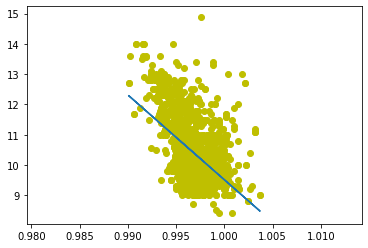

In [12]:
# Vẽ biểu đồ
plt.scatter(X,Y,c='y')
# Đường thẳng hồi quy:
plt.plot(X, clf.predict(X))
plt.show()


### Hồi quy đa biến

In [13]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# Tạo dataframe chỉ chứa data làm biến giải thích
wine_except_quality = df_Red_Wines.drop("quality", axis=1)
X = wine_except_quality
 
# Sử dụng quality làm biến mục tiêu
Y = df_Red_Wines['quality']
 
# Tạo model
clf.fit(X, Y)
 
# Hệ số hồi quy
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# Sai số
print(clf.intercept_)
# 
print(clf.score(X,Y))

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.96520844945198
0.36055170303868855


#### Chuẩn hoá các biến số
Mục đích để biết mức độ ảnh hưởng của các biến số giải thích đến biến mục tiêu như thế nào. Tiến hành chuẩn hoá xong, chúng ta sẽ biết được yếu tố nào ảnh hưởng lớn nhất đến chất lượng của rượu

In [14]:
# chuẩn hoá dữ liệu các cột
wine2 = df_Red_Wines.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# Tạo dataframe không chứa quality làm biến giải thích
X = wine2.drop("quality", axis=1)
 
# Sử dụng quality làm biến mục tiêu
Y = wine2['quality']

clf.fit(X, Y)
 
print(pd.DataFrame({"Name":X.columns, "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
print(clf.intercept_)

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
1.9140742913275187e-16


#### Nhìn vào kết quả, ta có thể dễ dàng thấy alcohol có giá trị lớn nhất, đồng nghĩa với việc biến số này ảnh hưởng lớn nhất đến chất lượng của rượu.